In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import random
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
def create_nonlinear_dataset(n):
    pos_class=n-random.randrange(1,n)
    neg_class=n-pos_class
    min_val = -20    
    max_val = 20
    m=round(random.uniform(-1,1),1)
    b=round(random.uniform(-5,5),1)
    # x1,y1 values for the +ve class
    x1 = [random.randrange(min_val, max_val) for i in range(pos_class)]
    y1 = [random.randrange(math.floor(m*x*x+b)+min_val, math.floor(m*x*x+b)) for x in x1]
    # x2,y2 values for the -ve clss 
    x2=[random.randrange(min_val,max_val) for i in range(neg_class)]
    y2=[random.randrange(math.ceil(m*x*x+b),max_val+math.floor(m*x*x+b)) for x in x2]
    data =[]
    for i in range(0,pos_class):
        data.append([1,x1[i]*x1[i],y1[i]*y1[i],1])
    for j in range(0,neg_class):
        data.append([1,x2[j]*x2[j],y2[j]*y2[j],-1])
    random.shuffle(data)
    
    return min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data

In [21]:
#non-linear plotting functions 

def plot_f_x_1(min_val,max_val,m,b):
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)*np.arange(min_val,max_val)+b)


def plot_g_x_1(weights,min_val,max_val):
    m=-(weights[1]/weights[2])
    b=-(weights[0]/weights[2])
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)+b,c="red")


def plot_data(x1,x2,y1,y2):
    plt.scatter(x1,y1,c="red")
    plt.scatter(x2,y2,c="green")
    plt.xlabel("x1")
    plt.ylabel("x2")

In [10]:
def perceptron_weights(w,x):
    return w[0]*x[0]+w[1]*x[1]+(w[2]*x[2])

In [11]:
def update_weight(w,x):
    w[0]=w[0]+x[0]*x[3]
    w[1]=w[1]+x[1]*x[3]
    w[2]=w[2]+x[2]*x[3]
    w=[w[0],w[1],w[2]]
    return w

In [13]:
def sign(x):
    if x>=0:
        return 1
    else:
        return -1

In [96]:
def calculate_metrics(pred, true_labels):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(pred)):
        if   (pred[i] == 1) & (true_labels[i] == 1):
            TP += 1
        elif (pred[i] == 1) & (true_labels[i] == -1):
            FP += 1
        elif (pred[i] == -1) & (true_labels[i] == -1):
            TN += 1
        else:
            FN += 1

    accuracy  = (TP + TN) / (TP + FP + TN + FN) 
    precision = (TP) / (TP + FP) 
    recall    = (TP) / (TP + FN) 
    f1_score  = (2 * precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score
accuracy, precision, recall, f1_score=calculate_metrics(pred,true_labels)
accuracy,precision,recall,f1_score

(0.8, 0.8, 1.0, 0.888888888888889)

In [100]:
def perceptron_learning_algorithm(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n,iter):
    #initial weights set to 0
    w_t=[0.0,0.0,0.0]
    iterations=0
    convergence=0
    
    def get_true(data):
        true=[]
        for d in data:
            true.append(d[3])
        return true
    true_labels=get_true(data)
    print(true_labels)
    while not convergence:
        iterations=iterations+1
        if iterations<iter:
            predicted=[]
            curr_ncorrect=0
            for d in data:
                predicted.append(sign(perceptron_weights(w_t,d)))
                if(sign(perceptron_weights(w_t,d))!=d[3]):
                    w_t=update_weight(w_t,d)   
                else:
                    curr_ncorrect=curr_ncorrect+1
            error=1 - curr_ncorrect/n
            print("After {} iterations the error rate is {}".format(iterations,error))
            print("#####################################################")
            print("Predicted",predicted)
            print("True Labels",true_labels)
            print("Predicted len",len(predicted))
            accuracy, precision, recall, f1_score=calculate_metrics(predicted,true_labels)
            print("Accuracy is {}, Precision is {},Recall is {}, f1 score is {}".format(accuracy,precision,recall,f1_score))
            print("#####################################################")
            plt.show()
            if(curr_ncorrect==n):
                convergence=1
        else:
            break
    plot_data(x1,x2,y1,y2)
    plot_f_x_1(min_val,max_val,m,b)
    plot_g_x_1(w_t,min_val,max_val)
    print("no of iterations performed = ",iterations)
    fx = mpatches.Patch(color='blue', label='f(x)')
    gx = mpatches.Patch(color='red', label='g(x)')
    plt.legend(handles=[fx, gx])
    plt.show()
    return predicted
    

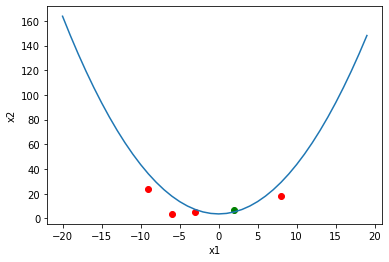

In [101]:
min_val,max_val,m,b,nl_x1,nl_x2,nl_y1,nl_y2,pos_class,neg_class,data_1=create_nonlinear_dataset(5)
plot_f_x_1(min_val,max_val,m,b)
plot_data(nl_x1,nl_x2,nl_y1,nl_y2)

[1, 1, -1, 1, 1]
After 1 iterations the error rate is 0.4
#####################################################
Predicted [1, 1, 1, -1, 1]
True Labels [1, 1, -1, 1, 1]
Predicted len 5
Accuracy is 0.6, Precision is 0.75,Recall is 0.75, f1 score is 0.75
#####################################################
After 2 iterations the error rate is 0.19999999999999996
#####################################################
Predicted [1, 1, 1, 1, 1]
True Labels [1, 1, -1, 1, 1]
Predicted len 5
Accuracy is 0.8, Precision is 0.8,Recall is 1.0, f1 score is 0.888888888888889
#####################################################
After 3 iterations the error rate is 0.19999999999999996
#####################################################
Predicted [1, 1, 1, 1, 1]
True Labels [1, 1, -1, 1, 1]
Predicted len 5
Accuracy is 0.8, Precision is 0.8,Recall is 1.0, f1 score is 0.888888888888889
#####################################################
After 4 iterations the error rate is 0.19999999999999996
#######

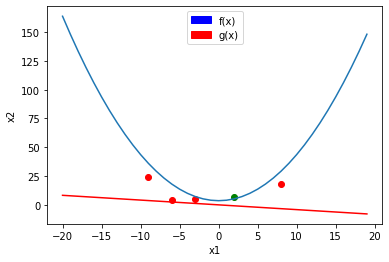

In [102]:
predicted=perceptron_learning_algorithm(pos_class, neg_class,nl_x1,nl_x2,nl_y1,nl_y2, min_val,max_val, m, b,data_1,n=5,iter=30)

In [90]:
true_labels=[]
for d in data_1:
    true_labels.append(d[3])
pred=predicted
true_labels
pred

[1, 1, 1, 1, 1]